# About Dataset
## Context
The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age. The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/HCV+data

## Content
All attributes except Category and Sex are numerical.

Attributes 1 to 4 refer to the data of the patient:

1) X (Patient ID/No.)

2) Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')

3) Age (in years)

4) Sex (f,m)

Attributes 5 to 14 refer to laboratory data:

5) ALB

6) ALP

7) ALT

8) AST

9) BIL

10) CHE

11) CHOL

12) CREA

13) GGT

14) PROT

The target attribute for classification is Category (2): blood donors vs. Hepatitis C patients (including its progress ('just' Hepatitis C, Fibrosis, Cirrhosis).

## Acknowledgements

Creators: Ralf Lichtinghagen, Frank Klawonn, Georg Hoffmann

Donor: Ralf Lichtinghagen: Institute of Clinical Chemistry; Medical University Hannover (MHH); Hannover, Germany; lichtinghagen.ralf '@' mh-hannover.de

Donor: Frank Klawonn; Helmholtz Centre for Infection Research; Braunschweig, Germany; frank.klawonn '@' helmholtz-hzi.de
Donor: Georg Hoffmann; Trillium GmbH; Grafrath, Germany; georg.hoffmann '@' trillium.de


## Relevant Papers
Lichtinghagen R et al. J Hepatol 2013; 59: 236-42

Hoffmann G et al. Using machine learning techniques to generate laboratory diagnostic pathways â€“ a case study. J Lab Precis Med 2018; 3: 58-67

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler 

import warnings
warnings.filterwarnings('ignore')

In [59]:
df = pd.read_csv('./HepatitisCdata.csv')

In [3]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
df.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [5]:
df.drop(columns = 'Unnamed: 0', inplace = True, axis = 1)

In [6]:
df.shape

(615, 13)

This dataset contain 615 rows and 13 columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [8]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [9]:
a = list(df.columns)
n = list(df._get_numeric_data())
c = list(set(a) - set(n))
print("All features : ")
print(a)
print("\n Numeric features : ")
print(n)
print("\n Categorical features : ")
print(c)

All features : 
['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

 Numeric features : 
['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

 Categorical features : 
['Category', 'Sex']


0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64


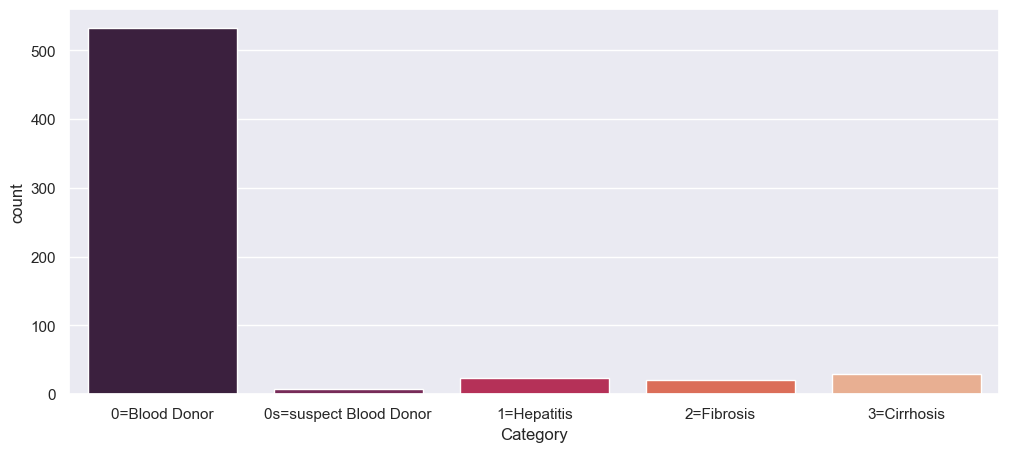

m    377
f    238
Name: Sex, dtype: int64


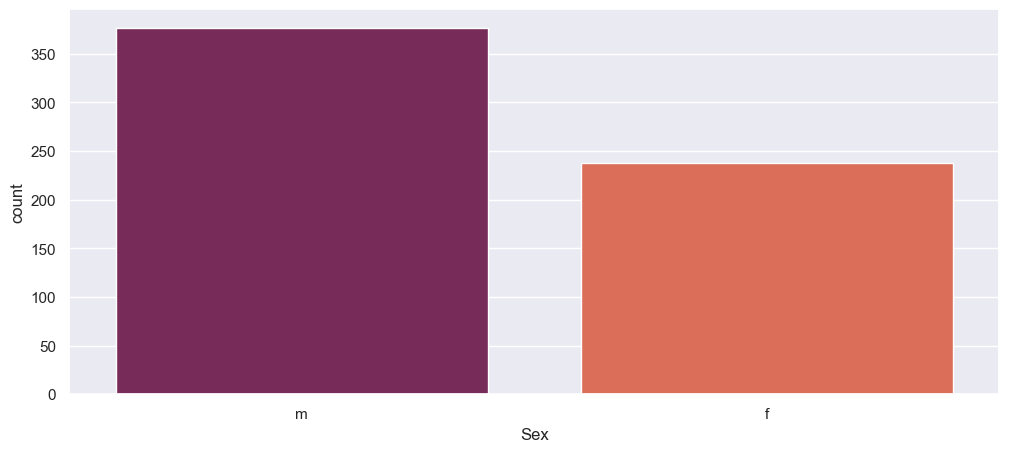

In [10]:
for i in c:
    print(df[i].value_counts())
    sns.set()
    plt.figure(figsize = (12, 5))
    sns.countplot(x = i, data = df, palette = 'rocket')
    plt.show()

In [10]:
print(df['Category'].unique(), "\n")
df.replace({'Category' : {'0=Blood Donor' : 'B', '0s=suspect Blood Donor' : 'B', '1=Hepatitis' : 'M', '2=Fibrosis' : 'M', '3=Cirrhosis' : 'M'}}, inplace = True)
print(df['Category'].value_counts())

['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis'] 

B    540
M     75
Name: Category, dtype: int64


M --> Malignant
 
B --> Benign

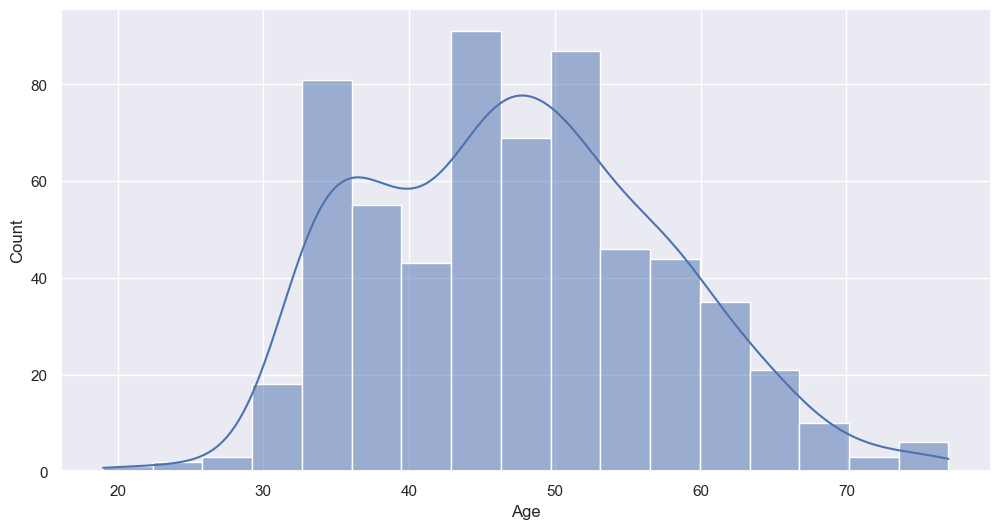

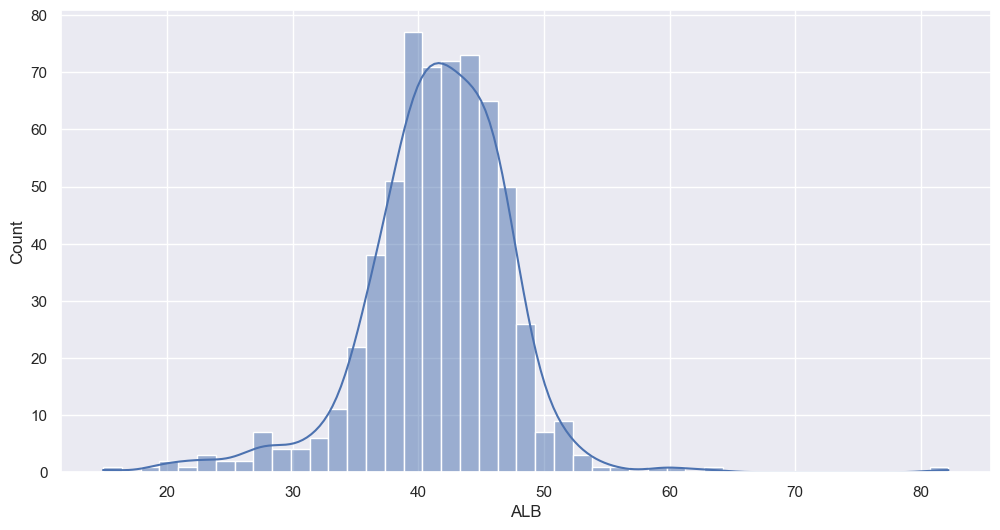

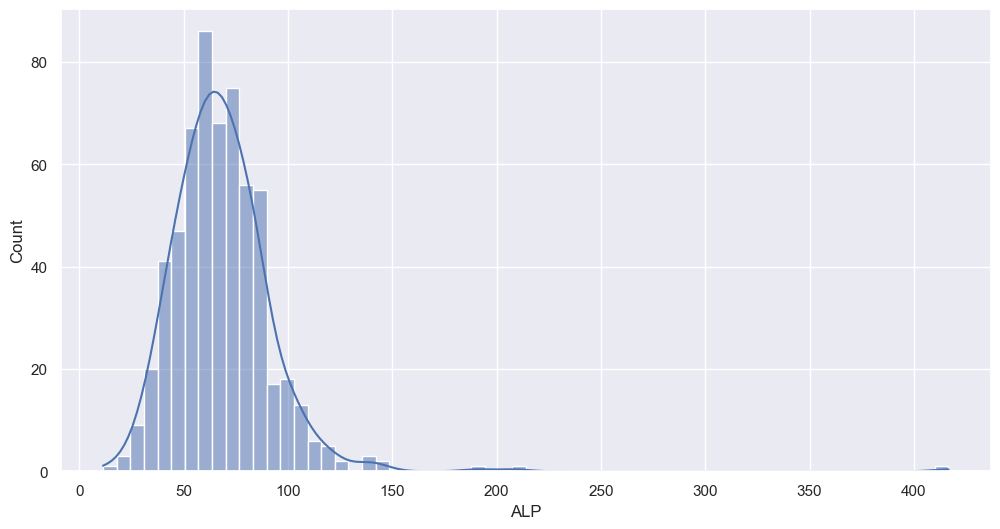

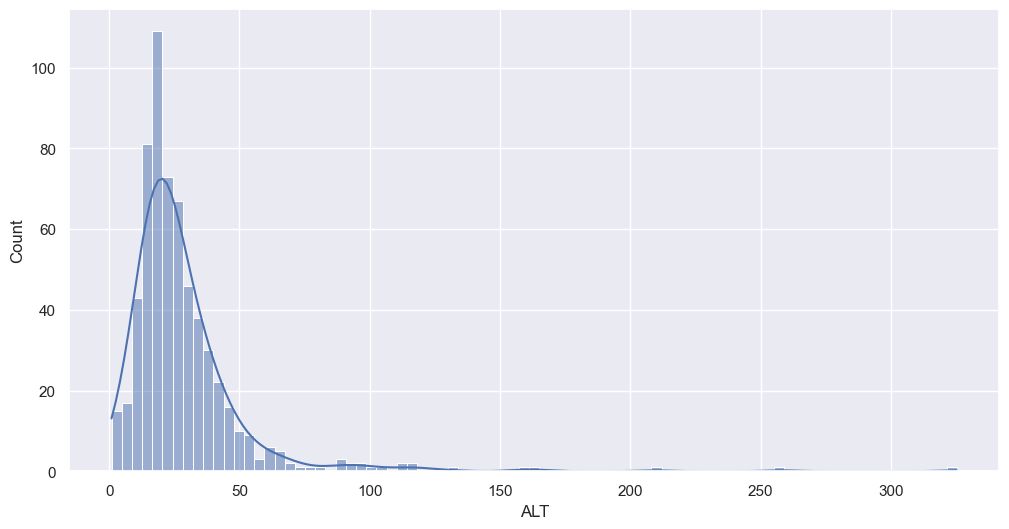

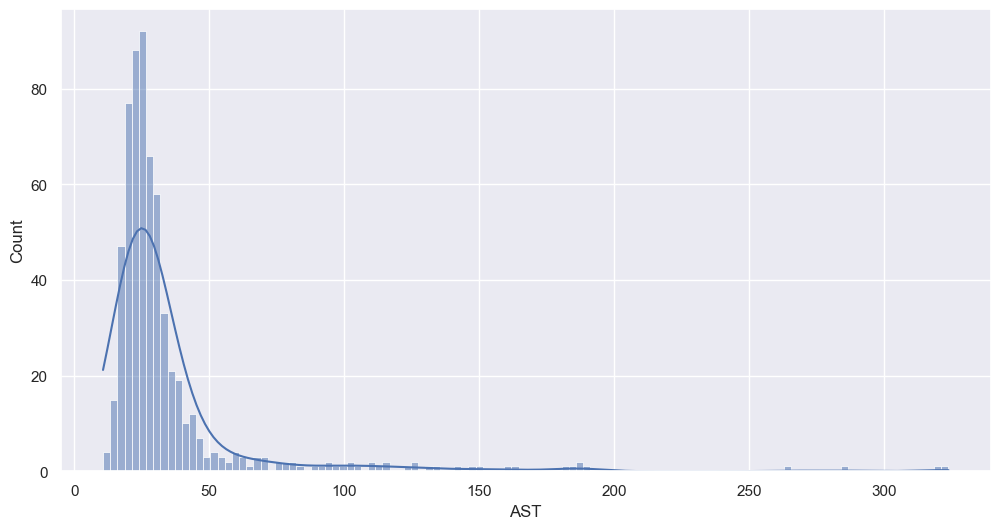

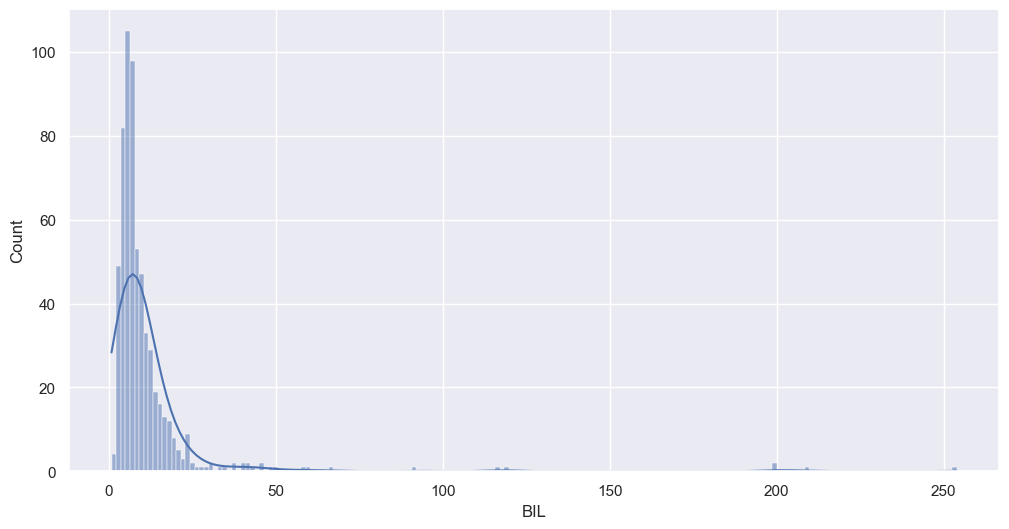

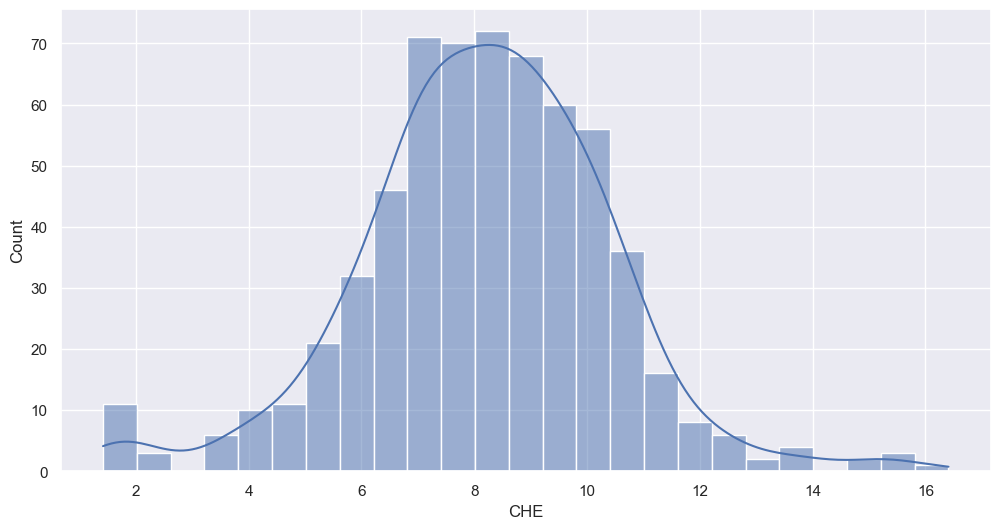

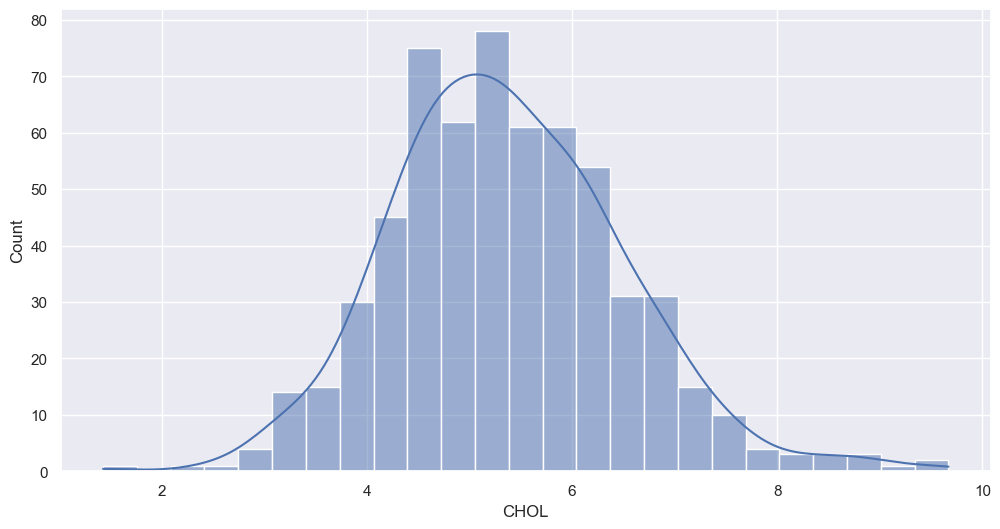

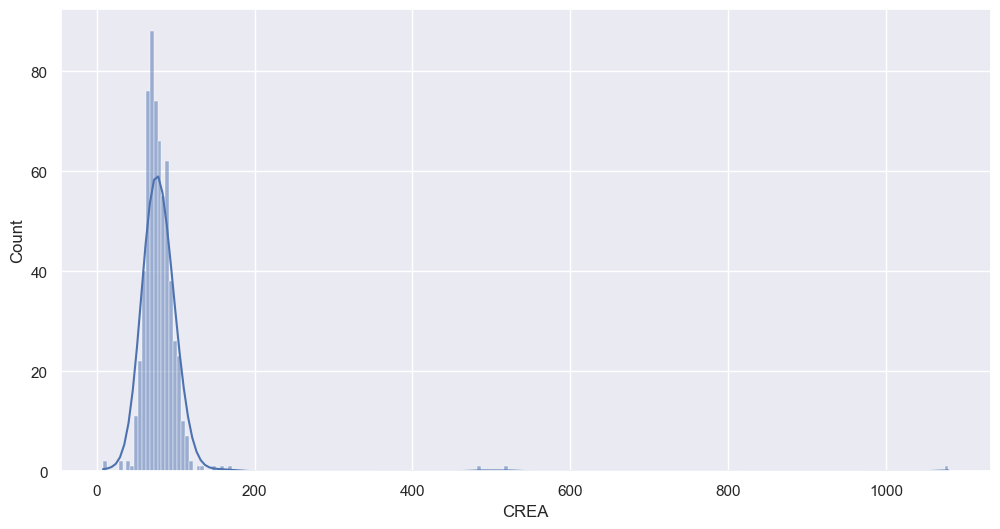

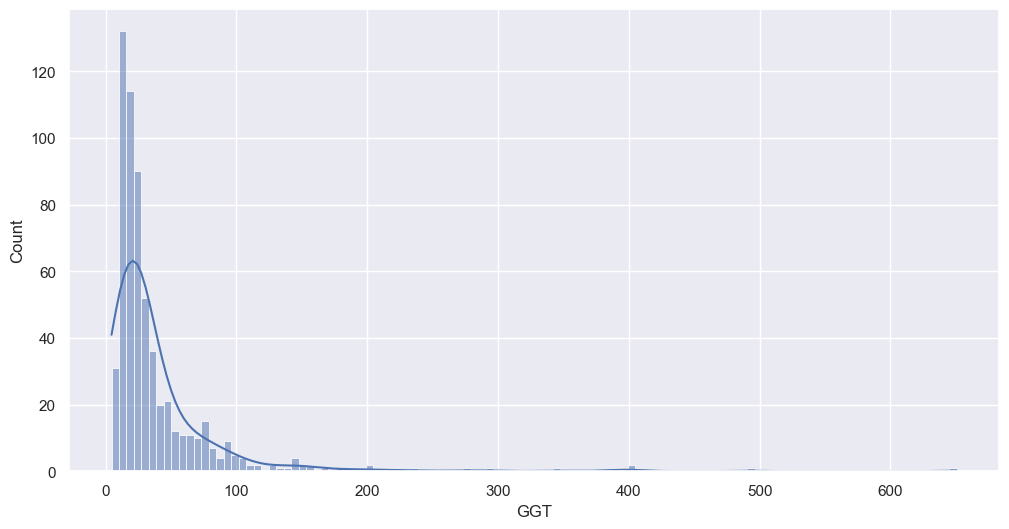

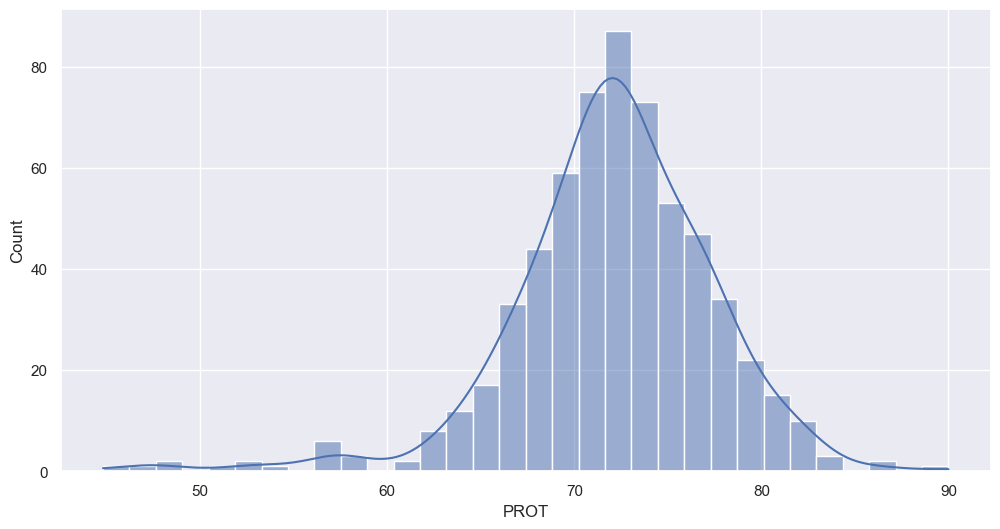

In [116]:
for i in n:
    sns.set()
    plt.figure(figsize = (12, 6))
    sns.histplot(data = df, x = i, kde=True)
    plt.show()

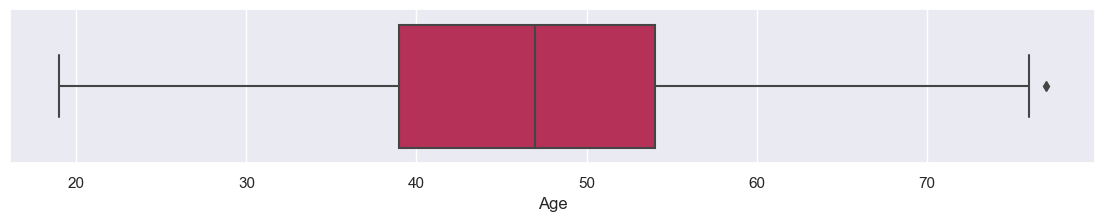

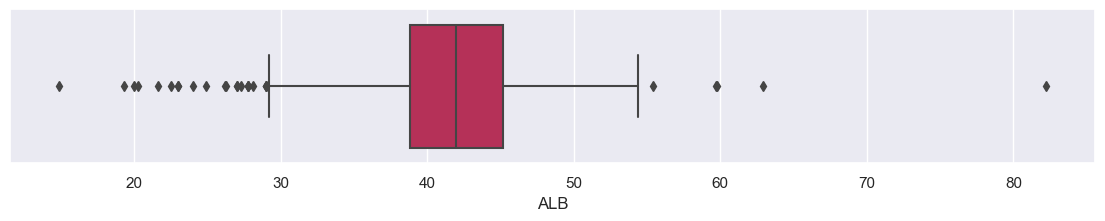

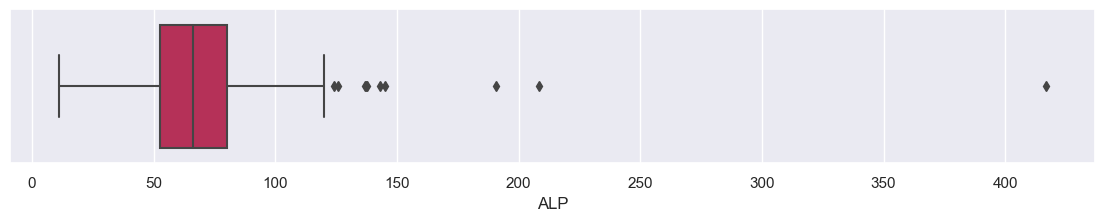

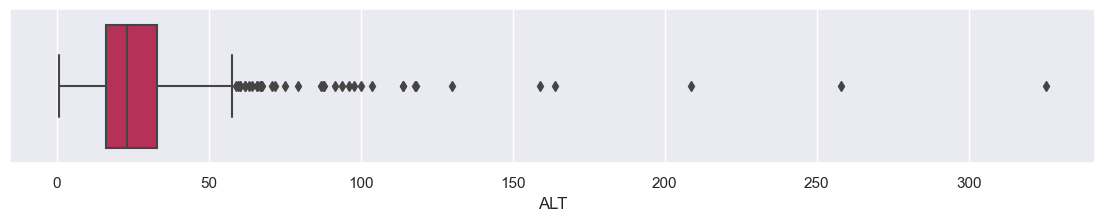

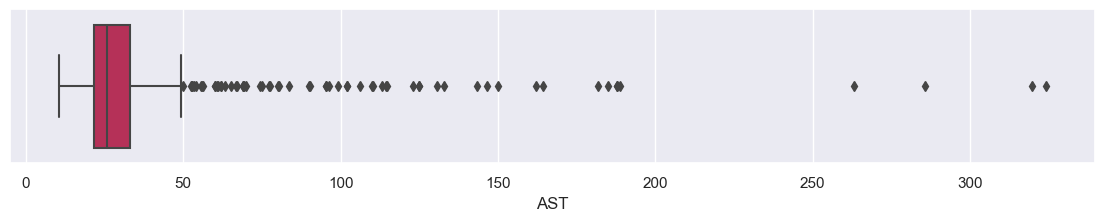

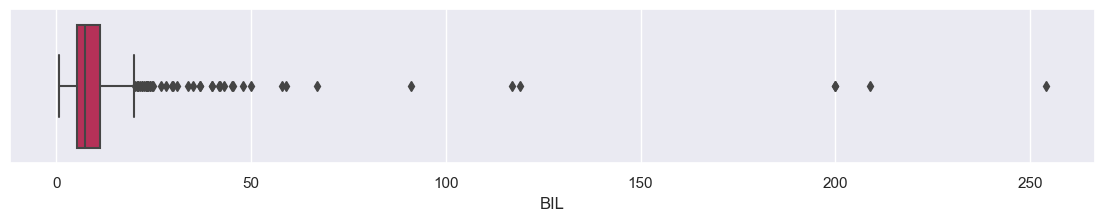

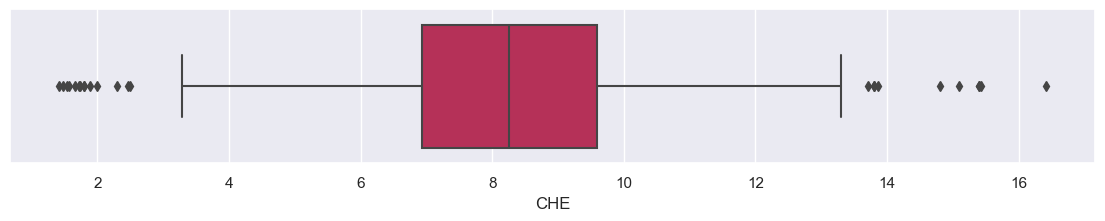

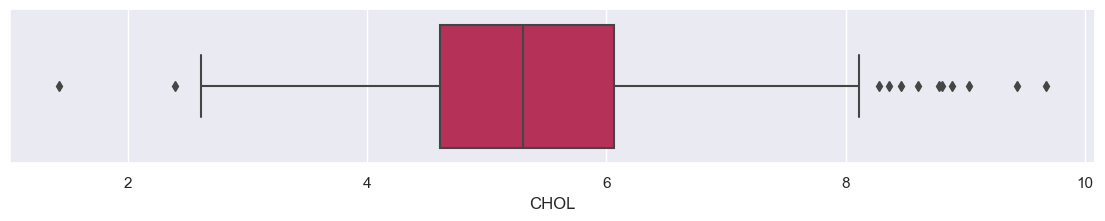

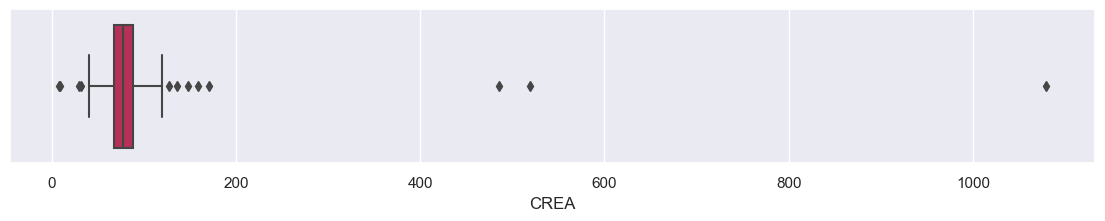

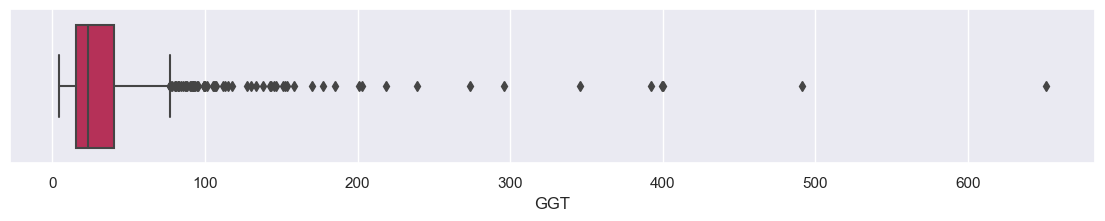

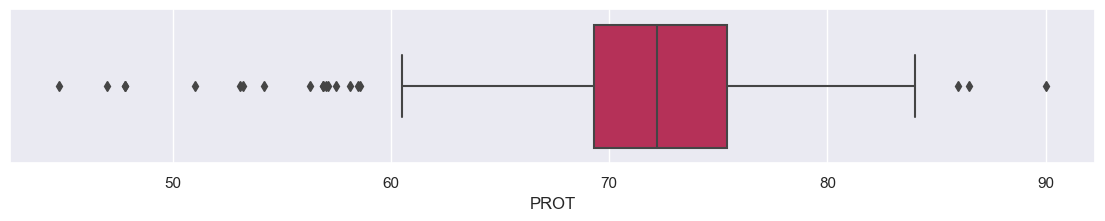

In [117]:
for i in n:
    sns.set()
    plt.figure(figsize = (14, 2))
    sns.boxplot(x = i, data = df, palette = 'rocket')
    plt.show()

<Figure size 2000x2000 with 0 Axes>

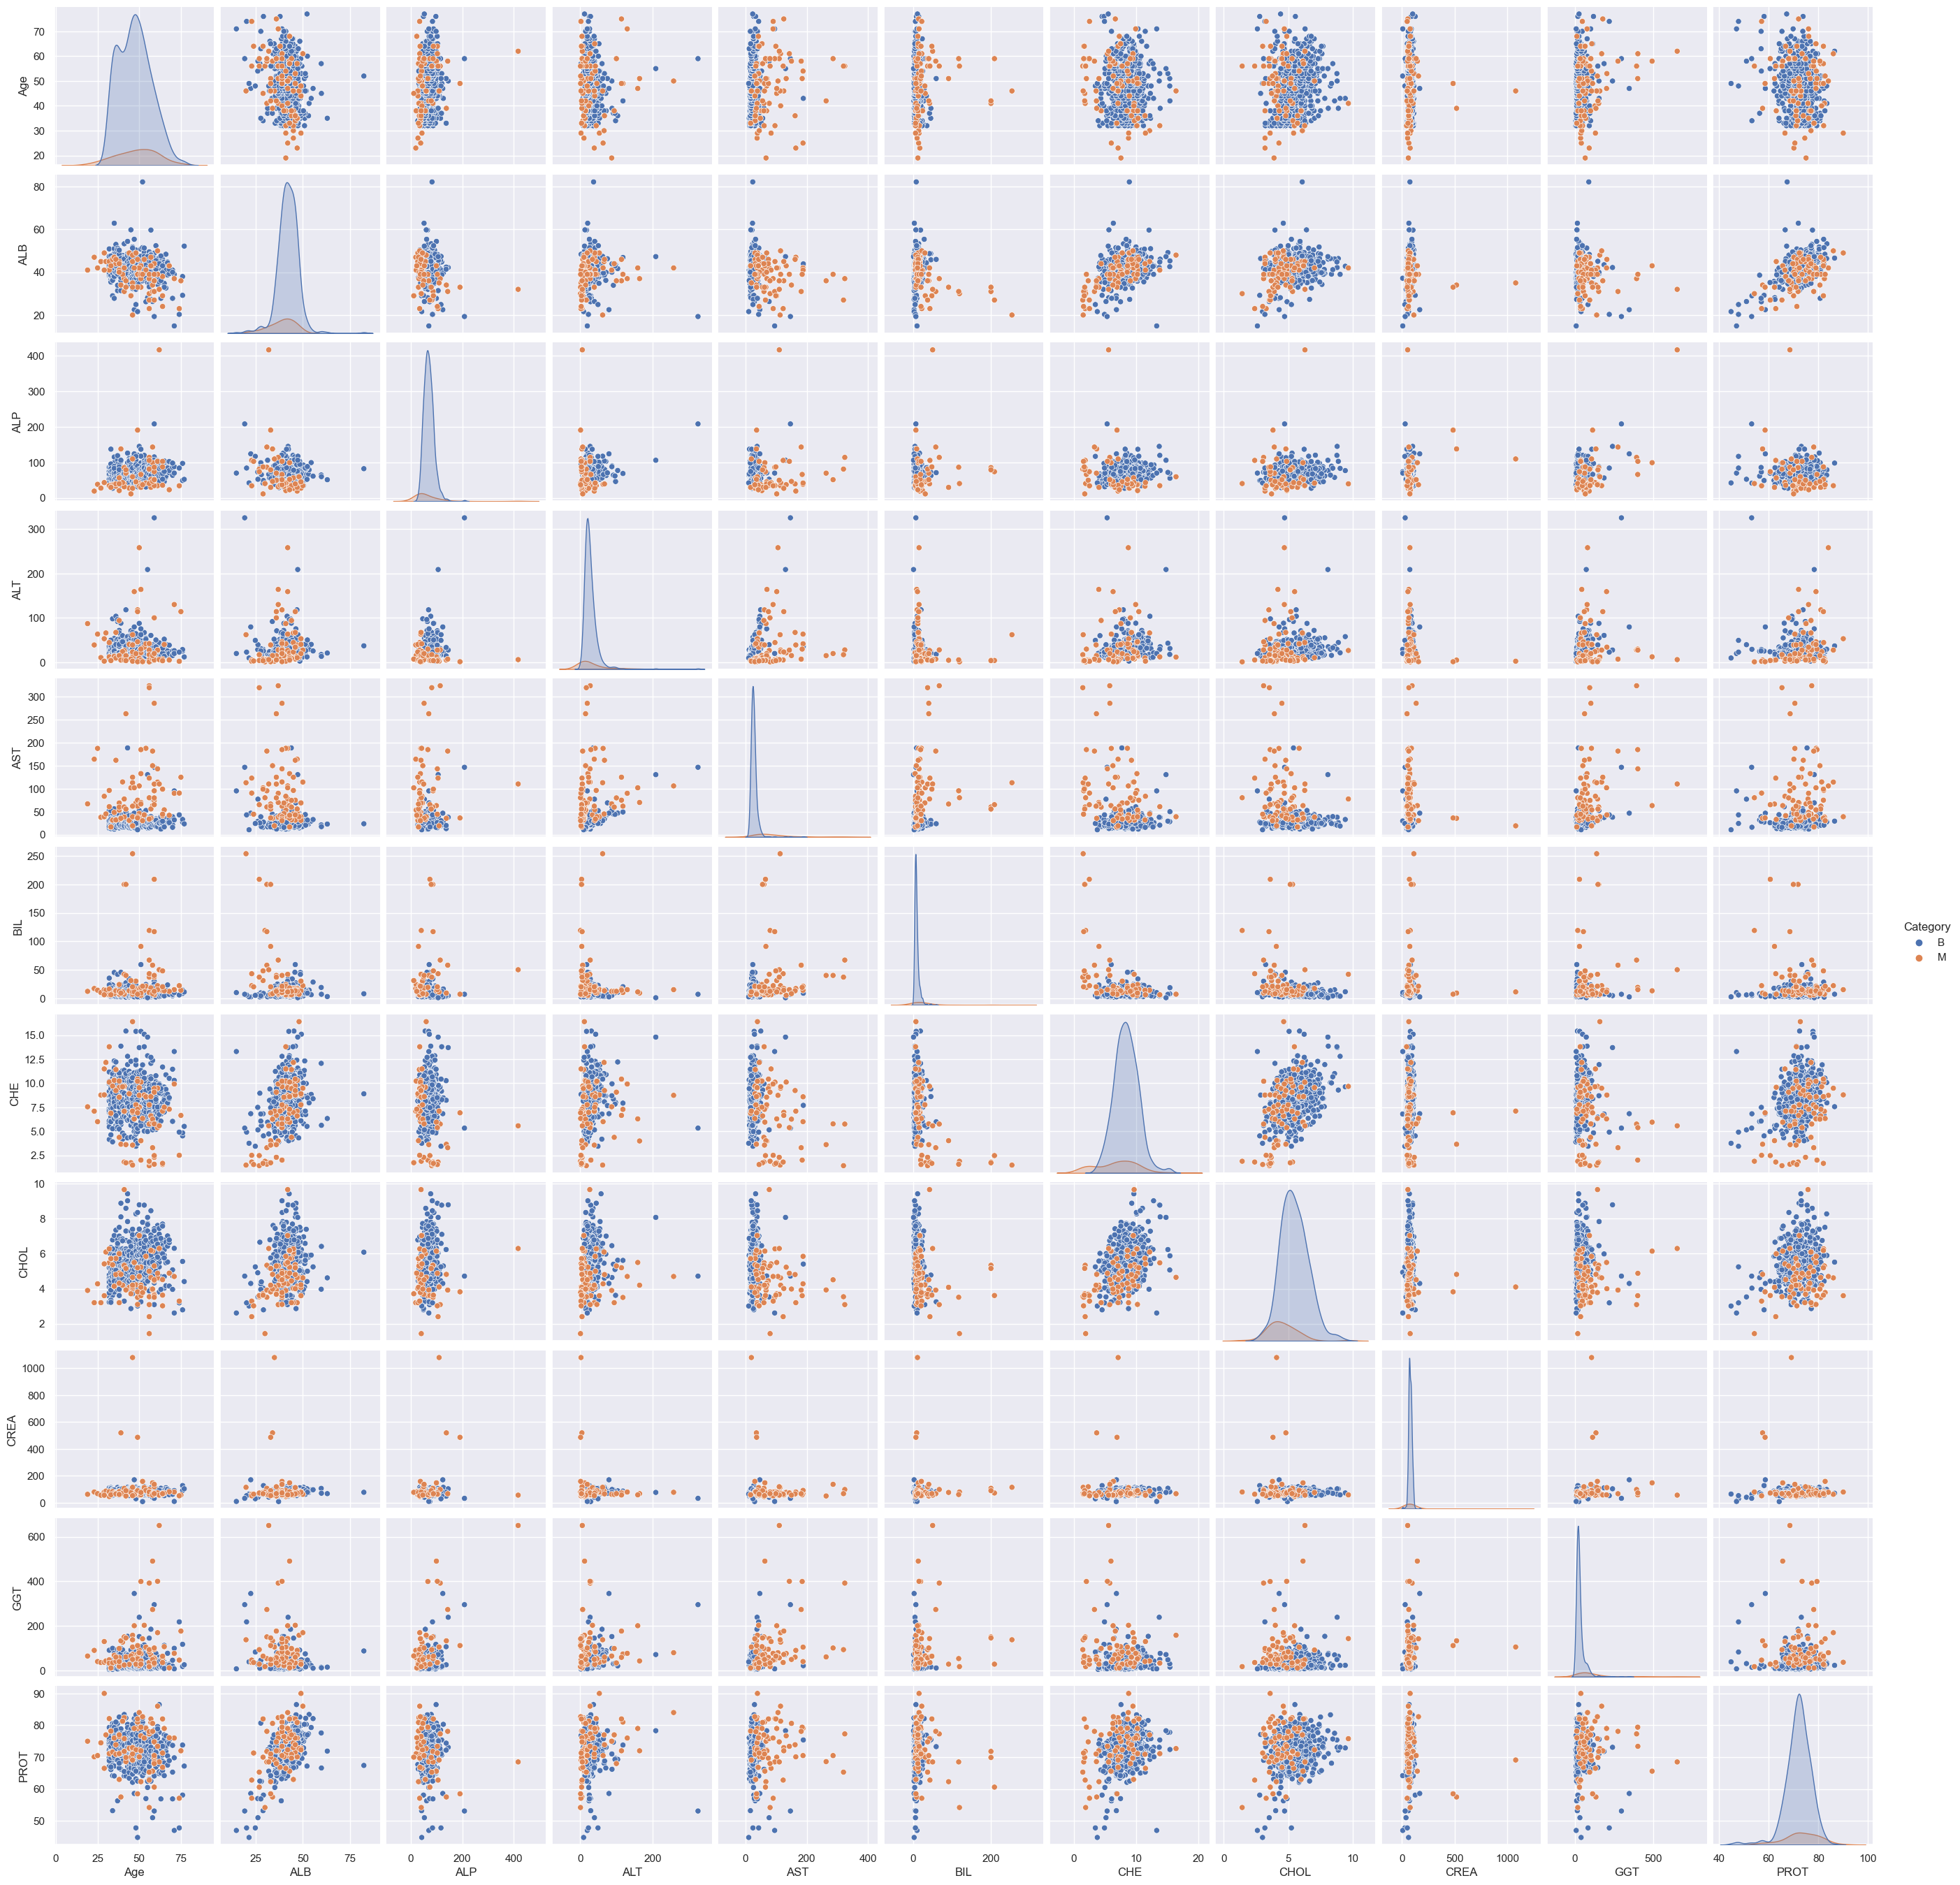

In [98]:
sns.set()
plt.figure(figsize = (20, 20))
sns.pairplot(data = df, hue = 'Category')
plt.savefig('pairplot.png')
plt.show()

# Dealing with duplicate values.

In [11]:
df.duplicated().sum()

0

This dataset doesn't contain any duplicate value.

# Dealing with null values.

In [12]:
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [13]:
df = pd.get_dummies(data = df, columns = ['Sex'])
df.head()

,Category,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m
0,B,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,1
1,B,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,1
2,B,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,1
3,B,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,1
4,B,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,1


In [14]:
df1 = df.select_dtypes(include = 'number')
df1.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m
0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,1
1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,1
2,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,1
3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,1
4,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,1


In [15]:
knni = KNNImputer(n_neighbors = 3)
df2 = knni.fit_transform(df1)

In [16]:
df1 = pd.DataFrame(data = df2, columns = df1.columns, index = df1.index)

In [17]:
df = pd.concat([df1, df['Category']], axis = 1)
df.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m,Category
0,32.0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0.0,1.0,B
1,32.0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0.0,1.0,B
2,32.0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0.0,1.0,B
3,32.0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0.0,1.0,B
4,32.0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0.0,1.0,B


In [18]:
df.isnull().sum()

Age         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
Sex_f       0
Sex_m       0
Category    0
dtype: int64

# Dealing with outliers

In [19]:
for i in n:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    upper = q3 + (IQR * 1.5)
    lowwer = q1 - (IQR * 1.5)
    df.loc[(df[i] >= upper), i] =  upper
    df.loc[(df[i] <= lowwer), i] =  lowwer

In [20]:
df.head(3)

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m,Category
0,32.0,38.5,52.5,7.7,22.10,7.5,6.93,3.23,106.0,12.1,69.0,0.0,1.0,B
1,32.0,38.5,70.3,18.0,24.70,3.9,11.17,4.80,74.0,15.6,76.5,0.0,1.0,B
2,32.0,46.9,74.7,36.2,49.85,6.1,8.84,5.20,86.0,33.2,79.3,0.0,1.0,B


# Split data.

In [30]:
x = df.drop(columns = 'Category', axis = 1)
y = df['Category']

In [31]:
x.head(3)

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m
0,32.0,38.5,52.5,7.7,22.10,7.5,6.93,3.23,106.0,12.1,69.0,0.0,1.0
1,32.0,38.5,70.3,18.0,24.70,3.9,11.17,4.80,74.0,15.6,76.5,0.0,1.0
2,32.0,46.9,74.7,36.2,49.85,6.1,8.84,5.20,86.0,33.2,79.3,0.0,1.0


In [32]:
y.head(3)

0    B
1    B
2    B
Name: Category, dtype: object

# Scaling data

In [33]:
sc = StandardScaler()
sc.fit(x)

StandardScaler()

In [34]:
xs = pd.DataFrame(data = sc.transform(x), columns = x.columns, index = x.index)

In [35]:
xs.head(3)

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m
0,-1.533898,-0.641691,-0.748632,-1.345915,-0.661420,-0.274541,-0.612353,-1.953364,1.800788,-0.903424,-0.667414,-0.794544,0.794544
1,-1.533898,-0.641691,0.143945,-0.582404,-0.399597,-0.991030,1.428327,-0.517834,-0.283815,-0.741189,0.898880,-0.794544,0.794544
2,-1.533898,1.043576,0.364581,0.766714,2.133046,-0.553176,0.306916,-0.152094,0.497911,0.074621,1.483630,-0.794544,0.794544
3,-1.533898,0.301256,-0.773704,0.351601,-0.611070,1.994341,-0.419836,-0.572695,0.107048,0.102432,0.731809,-0.794544,0.794544
4,-1.533898,-0.501252,0.334495,0.499855,-0.389526,0.143411,0.456117,-0.956723,-0.153528,-0.078344,-0.730066,-0.794544,0.794544


In [60]:
mm = MinMaxScaler()
mm.fit(x)

MinMaxScaler()

In [61]:
x = pd.DataFrame(data = mm.transform(x), columns = x.columns, index = x.index)
x.head(3)

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m
0,0.226087,0.363281,0.370841,0.119037,0.292994,0.348052,0.374529,0.133681,0.839286,0.104900,0.362705,0.0,1.0
1,0.226087,0.363281,0.535351,0.299344,0.359236,0.161039,0.773776,0.406250,0.458333,0.153209,0.670082,0.0,1.0
2,0.226087,0.691406,0.576017,0.617943,1.000000,0.275325,0.554379,0.475694,0.601190,0.396135,0.784836,0.0,1.0


# Dealing with Imbalance

The total observations : 615


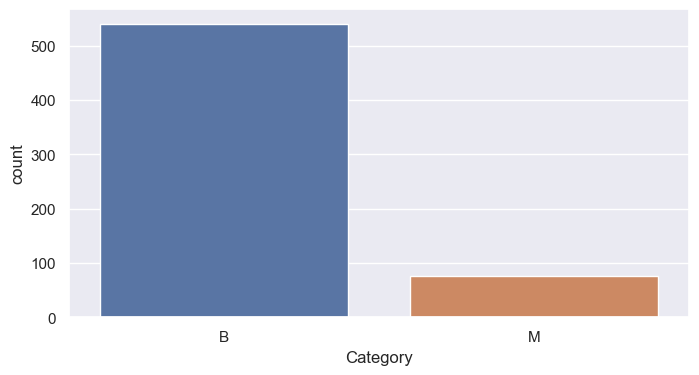

In [66]:
print("The total observations :", len(y.index))

sns.set()
plt.figure(figsize = (8, 4))
sns.countplot(x = y)
plt.show()

## SMOTE

The total observations before: 615
The total observations after: 1080


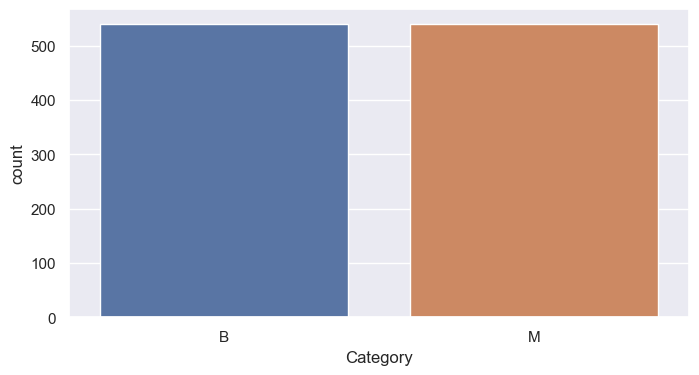

In [67]:
sm = SMOTE(random_state=0)
x_sm, y_sm = sm.fit_resample(x, y)

print("The total observations before:", len(y.index))
print("The total observations after:", len(y_sm.index))

sns.set()
plt.figure(figsize = (8, 4))
sns.countplot(x = y_sm)
plt.show()

## ADASYN

The total observations before: 615
The total observations after: 1079


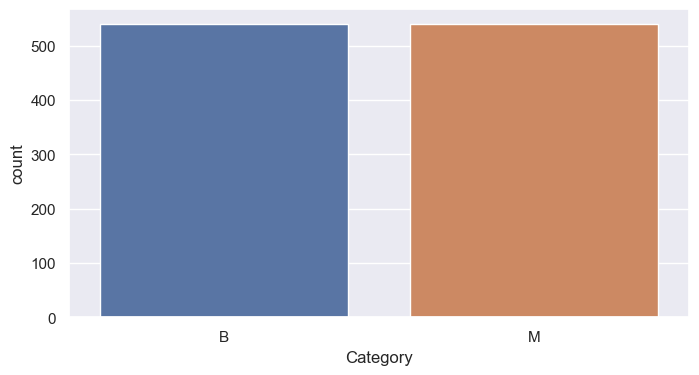

In [69]:
ada = ADASYN()
x_ada, y_ada = ada.fit_resample(x, y)

print("The total observations before:", len(y.index))
print("The total observations after:", len(y_ada.index))

sns.set()
plt.figure(figsize = (8, 4))
sns.countplot(x = y_ada)
plt.show()

## Random Oversampling

The number of classes before: 615
The total observations after: 1080


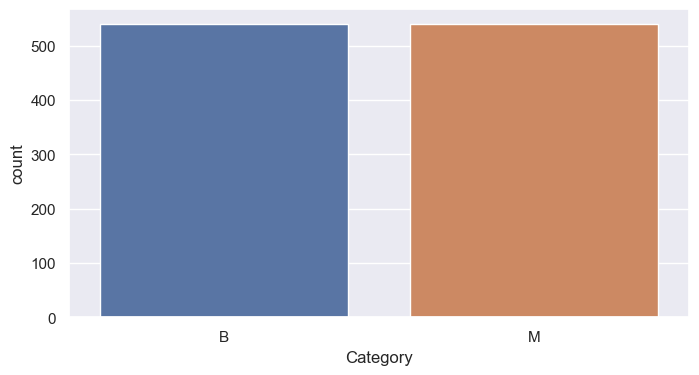

In [70]:
os = RandomOverSampler(sampling_strategy='minority')
x_o, y_o = os.fit_resample(x, y)

print("The number of classes before:", len(y.index))
print("The total observations after:", len(y_o.index))

sns.set()
plt.figure(figsize = (8, 4))
sns.countplot(x = y_o)
plt.show()

# Model building

In [71]:
def func(x, y):

    algorithms = {
        
        'LogisticRegression' : {
            'model': LogisticRegression(),
            'param_grid' : {
                'penalty': ['l1', 'l2'],              
                'C': [0.001, 0.01, 0.1, 1, 10],        
                'solver': ['liblinear', 'saga'],        
                }
            },
        
        'KNeighborsClassifier': {
            'model': KNeighborsClassifier(),
            'param_grid' : {
                'n_neighbors': [3, 5, 7],         
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree'],  
                'p': [1, 2]                         
                }
        },
        
        'DecisionTreeClassifier': {
            'model': DecisionTreeClassifier(),
            'param_grid' : {
                'criterion': ['gini', 'entropy'],           
                'splitter': ['best', 'random'],          
                'max_depth': [None, 5, 10, 20]         
                }
        },
        
        'RandomForestClassifier' : {
            'model' : RandomForestClassifier(),
            'param_grid' : {
                'n_estimators': [100, 200, 500],         
                'criterion': ['gini', 'entropy'],          
                'min_samples_leaf': [1, 2, 4]
            }
        },
    
        'ExtraTreesClassifier' : {
            'model' : ExtraTreesClassifier(),
            'param_grid' : {
                'n_estimators': [100, 200, 500],         
                'criterion': ['gini', 'entropy'],          
                'max_depth': [None, 5, 10, 20]
            }
        },
    
        'SVC' : {
            'model' : SVC(),
            'param_grid' : {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'poly', 'rbf'],
                'gamma': ['scale', 'auto', 0.1, 1]
            }
        }
    }
    
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    a = []
    b = []
    c = []

    for i, j in algorithms.items():
        print(i, "Algorithm")
        gsc =  GridSearchCV(j['model'], j['param_grid'], cv=cv)
        gsc.fit(x, y)
        best_param = gsc.best_params_
        best_score = gsc.best_score_
        

        a.append(best_param)
        b.append(best_score)
        c.append(i)
        
        y_pred = gsc.predict(x)

        print("\n classification report :")
        print(classification_report(y, y_pred))

        sns.set()
        sns.heatmap(confusion_matrix(y, y_pred), annot = True, linewidths = 0.6, cmap = "coolwarm_r", fmt = 'g')
        plt.show()
        print("\n \n")
        
    d = pd.DataFrame({"Algorith" : c, "Best parameter" : a, "Best score" : b})
        
    return d

## Imbalance

LogisticRegression Algorithm

 classification report :
              precision    recall  f1-score   support

           B       0.98      0.99      0.99       540
           M       0.95      0.84      0.89        75

    accuracy                           0.98       615
   macro avg       0.97      0.92      0.94       615
weighted avg       0.98      0.98      0.97       615



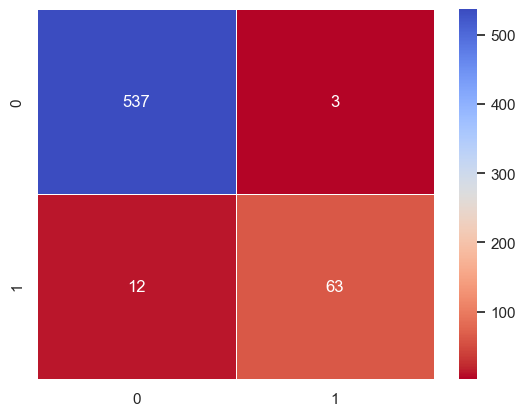


 

KNeighborsClassifier Algorithm

 classification report :
              precision    recall  f1-score   support

           B       0.99      1.00      0.99       540
           M       1.00      0.89      0.94        75

    accuracy                           0.99       615
   macro avg       0.99      0.95      0.97       615
weighted avg       0.99      0.99      0.99       615



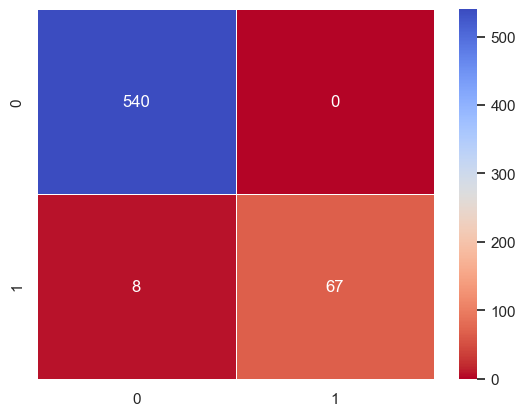


 

DecisionTreeClassifier Algorithm

 classification report :
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       540
           M       1.00      1.00      1.00        75

    accuracy                           1.00       615
   macro avg       1.00      1.00      1.00       615
weighted avg       1.00      1.00      1.00       615



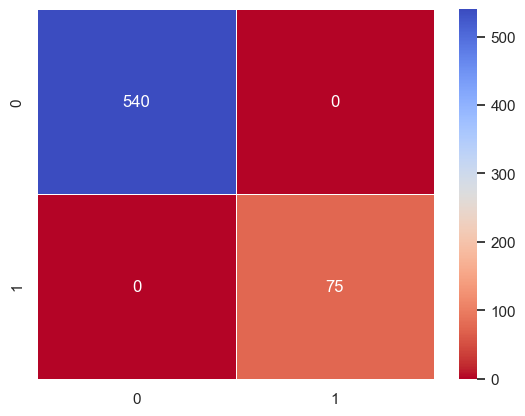


 

RandomForestClassifier Algorithm

 classification report :
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       540
           M       1.00      0.97      0.99        75

    accuracy                           1.00       615
   macro avg       1.00      0.99      0.99       615
weighted avg       1.00      1.00      1.00       615



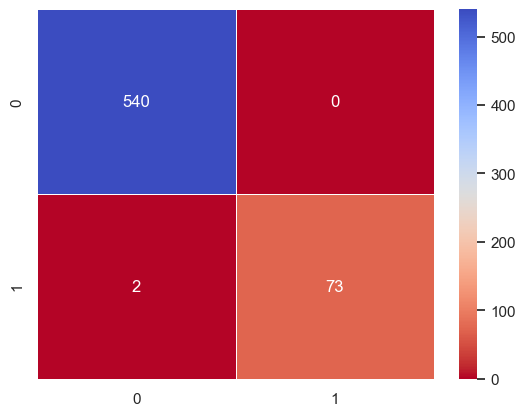


 

ExtraTreesClassifier Algorithm

 classification report :
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       540
           M       1.00      1.00      1.00        75

    accuracy                           1.00       615
   macro avg       1.00      1.00      1.00       615
weighted avg       1.00      1.00      1.00       615



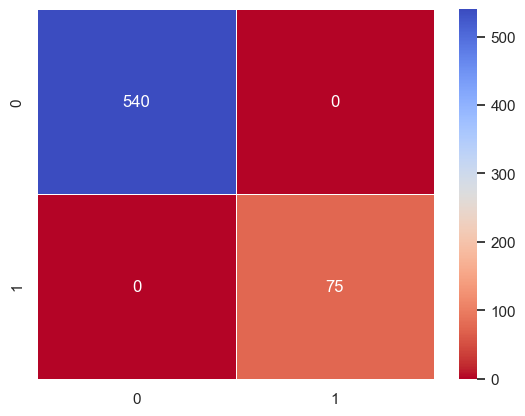


 

SVC Algorithm

 classification report :
              precision    recall  f1-score   support

           B       0.99      1.00      1.00       540
           M       1.00      0.95      0.97        75

    accuracy                           0.99       615
   macro avg       1.00      0.97      0.98       615
weighted avg       0.99      0.99      0.99       615



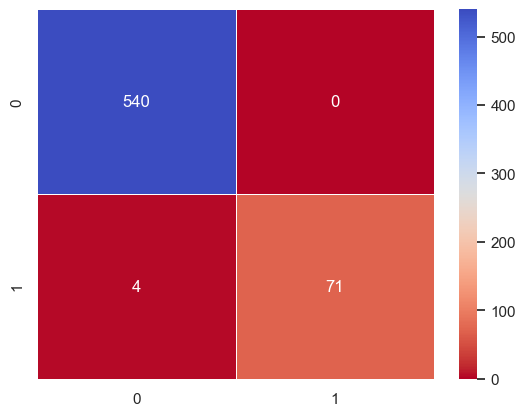

In [72]:
d1 = func(x, y)

In [101]:
d1

,Algorith,Best parameter,Best score
0,LogisticRegression,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",0.957724
1,KNeighborsClassifier,"{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2...",0.956098
2,DecisionTreeClassifier,"{'criterion': 'entropy', 'max_depth': None, 's...",0.951220
3,RandomForestClassifier,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.960976
4,ExtraTreesClassifier,"{'criterion': 'entropy', 'max_depth': 20, 'n_e...",0.960976
5,SVC,"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}",0.972358


In [117]:
d1_m = d1.max()
method = pd.Series({'method' :  'Imbalance'})
d1_m = d1_m.append(method)
print(d1_m)

Algorith            SVC
Best score     0.972358
method        Imbalance
dtype: object


## SMOTE

LogisticRegression Algorithm

 classification report :
              precision    recall  f1-score   support

           B       0.96      0.96      0.96       540
           M       0.96      0.96      0.96       540

    accuracy                           0.96      1080
   macro avg       0.96      0.96      0.96      1080
weighted avg       0.96      0.96      0.96      1080



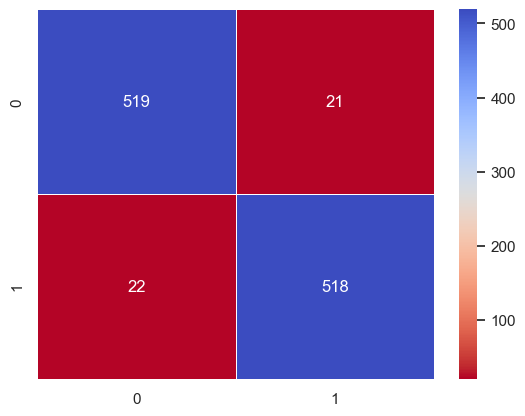


 

KNeighborsClassifier Algorithm

 classification report :
              precision    recall  f1-score   support

           B       1.00      0.99      0.99       540
           M       0.99      1.00      0.99       540

    accuracy                           0.99      1080
   macro avg       0.99      0.99      0.99      1080
weighted avg       0.99      0.99      0.99      1080



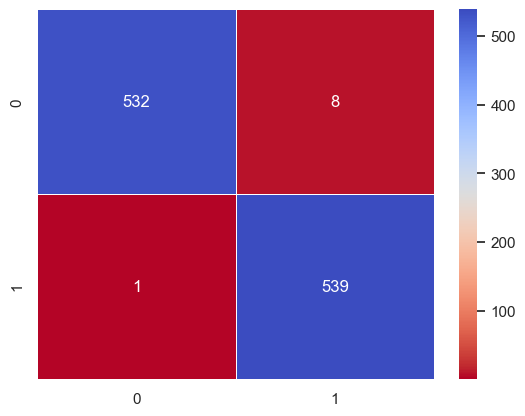


 

DecisionTreeClassifier Algorithm

 classification report :
              precision    recall  f1-score   support

           B       0.99      1.00      0.99       540
           M       1.00      0.99      0.99       540

    accuracy                           0.99      1080
   macro avg       0.99      0.99      0.99      1080
weighted avg       0.99      0.99      0.99      1080



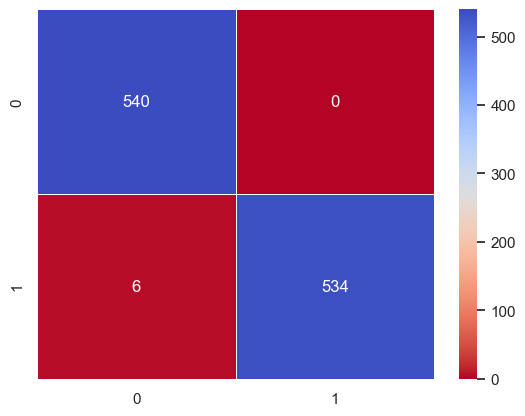


 

RandomForestClassifier Algorithm

 classification report :
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       540
           M       1.00      1.00      1.00       540

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080



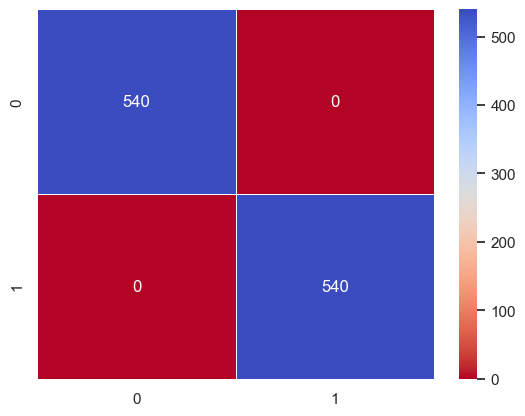


 

ExtraTreesClassifier Algorithm

 classification report :
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       540
           M       1.00      1.00      1.00       540

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080



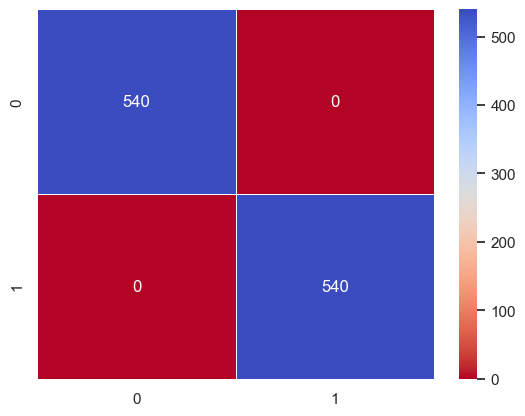


 

SVC Algorithm

 classification report :
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       540
           M       1.00      1.00      1.00       540

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080



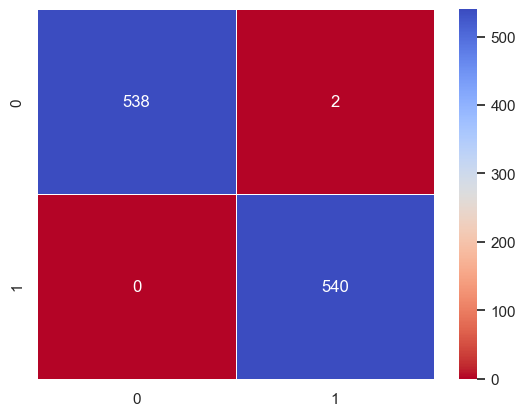

In [76]:
d2 = func(x_sm, y_sm)

In [77]:
d2

,Algorith,Best parameter,Best score
0,LogisticRegression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.952778
1,KNeighborsClassifier,"{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2...",0.990741
2,DecisionTreeClassifier,"{'criterion': 'entropy', 'max_depth': 10, 'spl...",0.970370
3,RandomForestClassifier,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.989815
4,ExtraTreesClassifier,"{'criterion': 'gini', 'max_depth': None, 'n_es...",0.993519
5,SVC,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.995370


In [118]:
d2_m = d2.max()
method = pd.Series({'method' :  'Smote'})
d2_m = d2_m.append(method)
print(d2_m)

Algorith          SVC
Best score    0.99537
method          Smote
dtype: object


## ADASYN

LogisticRegression Algorithm

 classification report :
              precision    recall  f1-score   support

           B       0.94      0.94      0.94       540
           M       0.94      0.94      0.94       539

    accuracy                           0.94      1079
   macro avg       0.94      0.94      0.94      1079
weighted avg       0.94      0.94      0.94      1079



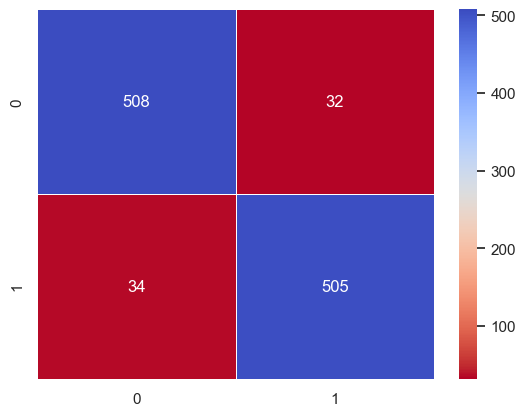


 

KNeighborsClassifier Algorithm

 classification report :
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       540
           M       1.00      1.00      1.00       539

    accuracy                           1.00      1079
   macro avg       1.00      1.00      1.00      1079
weighted avg       1.00      1.00      1.00      1079



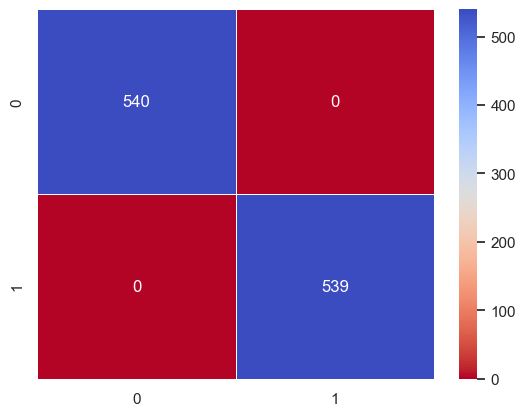


 

DecisionTreeClassifier Algorithm

 classification report :
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       540
           M       1.00      1.00      1.00       539

    accuracy                           1.00      1079
   macro avg       1.00      1.00      1.00      1079
weighted avg       1.00      1.00      1.00      1079



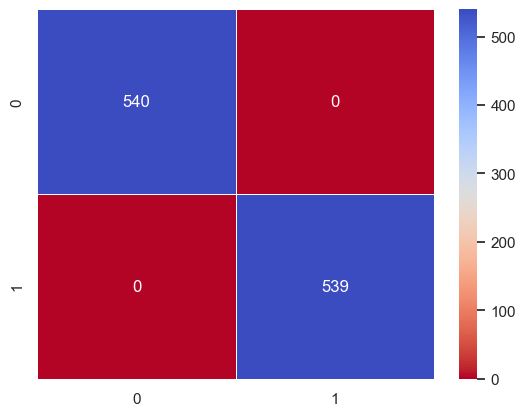


 

RandomForestClassifier Algorithm

 classification report :
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       540
           M       1.00      1.00      1.00       539

    accuracy                           1.00      1079
   macro avg       1.00      1.00      1.00      1079
weighted avg       1.00      1.00      1.00      1079



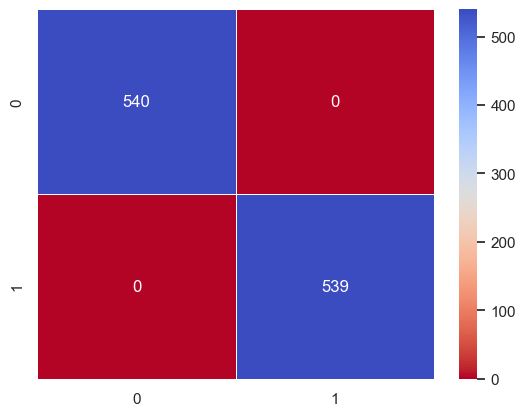


 

ExtraTreesClassifier Algorithm

 classification report :
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       540
           M       1.00      1.00      1.00       539

    accuracy                           1.00      1079
   macro avg       1.00      1.00      1.00      1079
weighted avg       1.00      1.00      1.00      1079



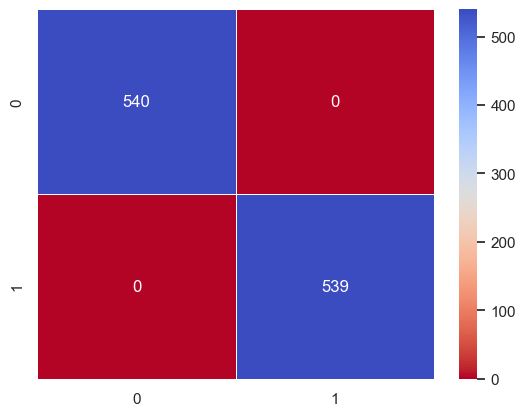


 

SVC Algorithm

 classification report :
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       540
           M       1.00      1.00      1.00       539

    accuracy                           1.00      1079
   macro avg       1.00      1.00      1.00      1079
weighted avg       1.00      1.00      1.00      1079



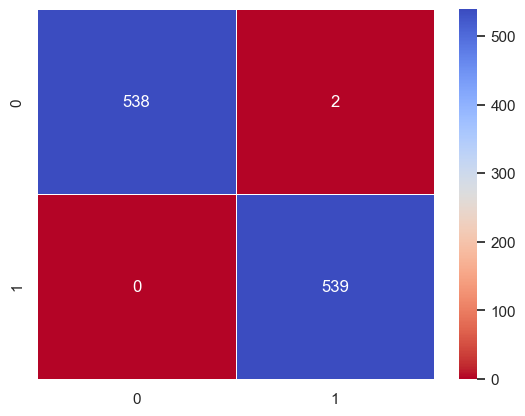

In [78]:
d3 = func(x_ada, y_ada) 

In [79]:
d3

,Algorith,Best parameter,Best score
0,LogisticRegression,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.937963
1,KNeighborsClassifier,"{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2...",0.991667
2,DecisionTreeClassifier,"{'criterion': 'gini', 'max_depth': None, 'spli...",0.964815
3,RandomForestClassifier,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.991667
4,ExtraTreesClassifier,"{'criterion': 'entropy', 'max_depth': None, 'n...",0.997222
5,SVC,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.996296


In [119]:
d3_m = d3.max()
method = pd.Series({'method' :  'ADAYN'})
d3_m = d3_m.append(method)
print(d3_m)

Algorith           SVC
Best score    0.997222
method           ADAYN
dtype: object


## Random Oversampling

LogisticRegression Algorithm

 classification report :
              precision    recall  f1-score   support

           B       0.94      0.96      0.95       540
           M       0.95      0.94      0.95       540

    accuracy                           0.95      1080
   macro avg       0.95      0.95      0.95      1080
weighted avg       0.95      0.95      0.95      1080



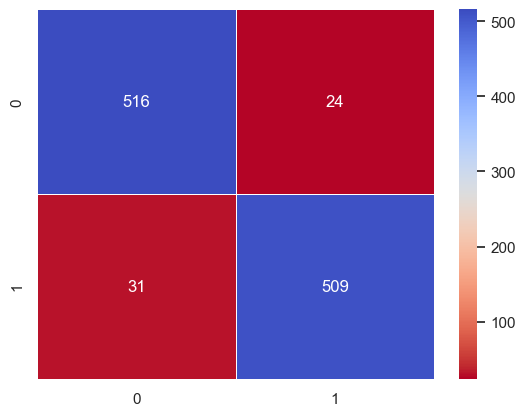


 

KNeighborsClassifier Algorithm

 classification report :
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       540
           M       1.00      1.00      1.00       540

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080



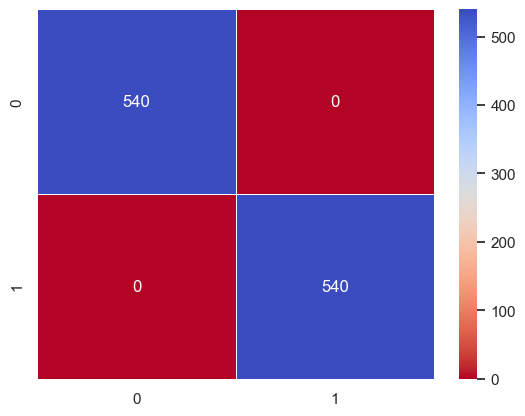


 

DecisionTreeClassifier Algorithm

 classification report :
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       540
           M       1.00      1.00      1.00       540

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080



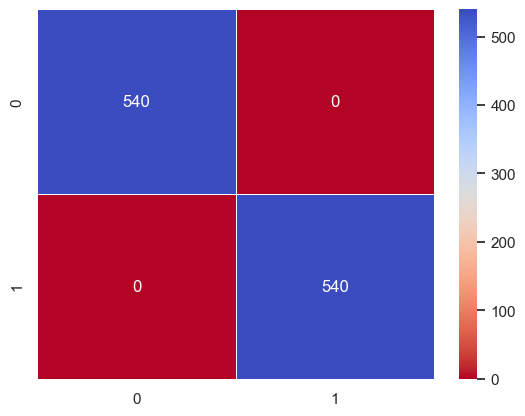


 

RandomForestClassifier Algorithm

 classification report :
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       540
           M       1.00      1.00      1.00       540

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080



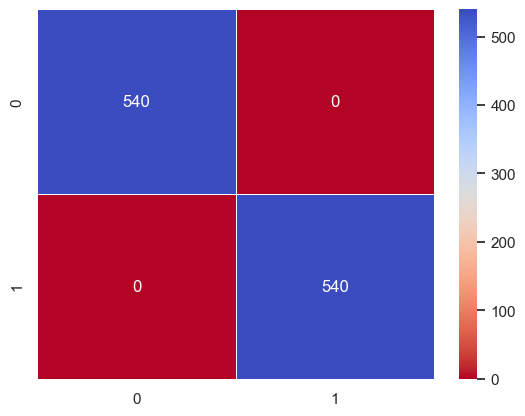


 

ExtraTreesClassifier Algorithm

 classification report :
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       540
           M       1.00      1.00      1.00       540

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080



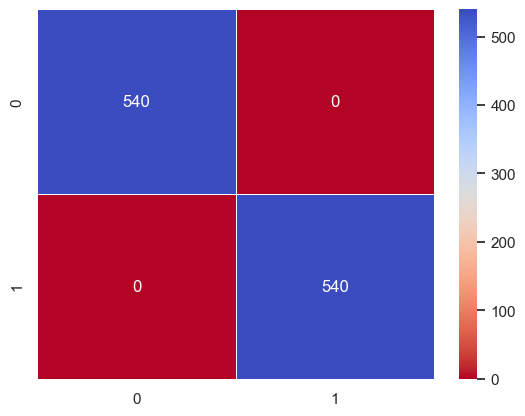


 

SVC Algorithm

 classification report :
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       540
           M       1.00      1.00      1.00       540

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080



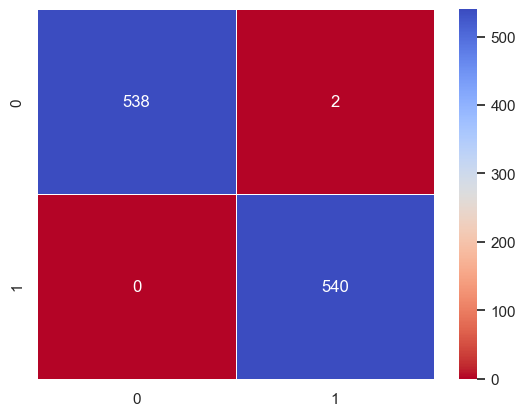

In [80]:
d4 = func(x_o, y_o)

In [85]:
d4

,Algorith,Best parameter,Best score
0,LogisticRegression,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.937963
1,KNeighborsClassifier,"{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2...",0.986111
2,DecisionTreeClassifier,"{'criterion': 'gini', 'max_depth': 20, 'splitt...",0.983333
3,RandomForestClassifier,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.992593
4,ExtraTreesClassifier,"{'criterion': 'gini', 'max_depth': None, 'n_es...",0.993519
5,SVC,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.990741


In [120]:
d4_m = d4.max()
method = pd.Series({'method' :  'Random Oversampling'})
d4_m = d4_m.append(method)
print(d4_m)

Algorith                      SVC
Best score               0.993519
method        Random Oversampling
dtype: object


# Choose best model

In [142]:
a = pd.DataFrame([d1_m, d2_m, d3_m, d4_m])
a

,Algorith,Best score,method
0,SVC,0.972358,Imbalance
1,SVC,0.995370,Smote
2,SVC,0.997222,ADAYN
3,SVC,0.993519,Random Oversampling


Based on above results we can say that SVC gives the best score. Hence we will use that.